<a href="https://colab.research.google.com/github/millyazhukovich/machine_learning2024/blob/Zhukovich/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df_binary = data[data['Outcome'].isin([0, 1])]

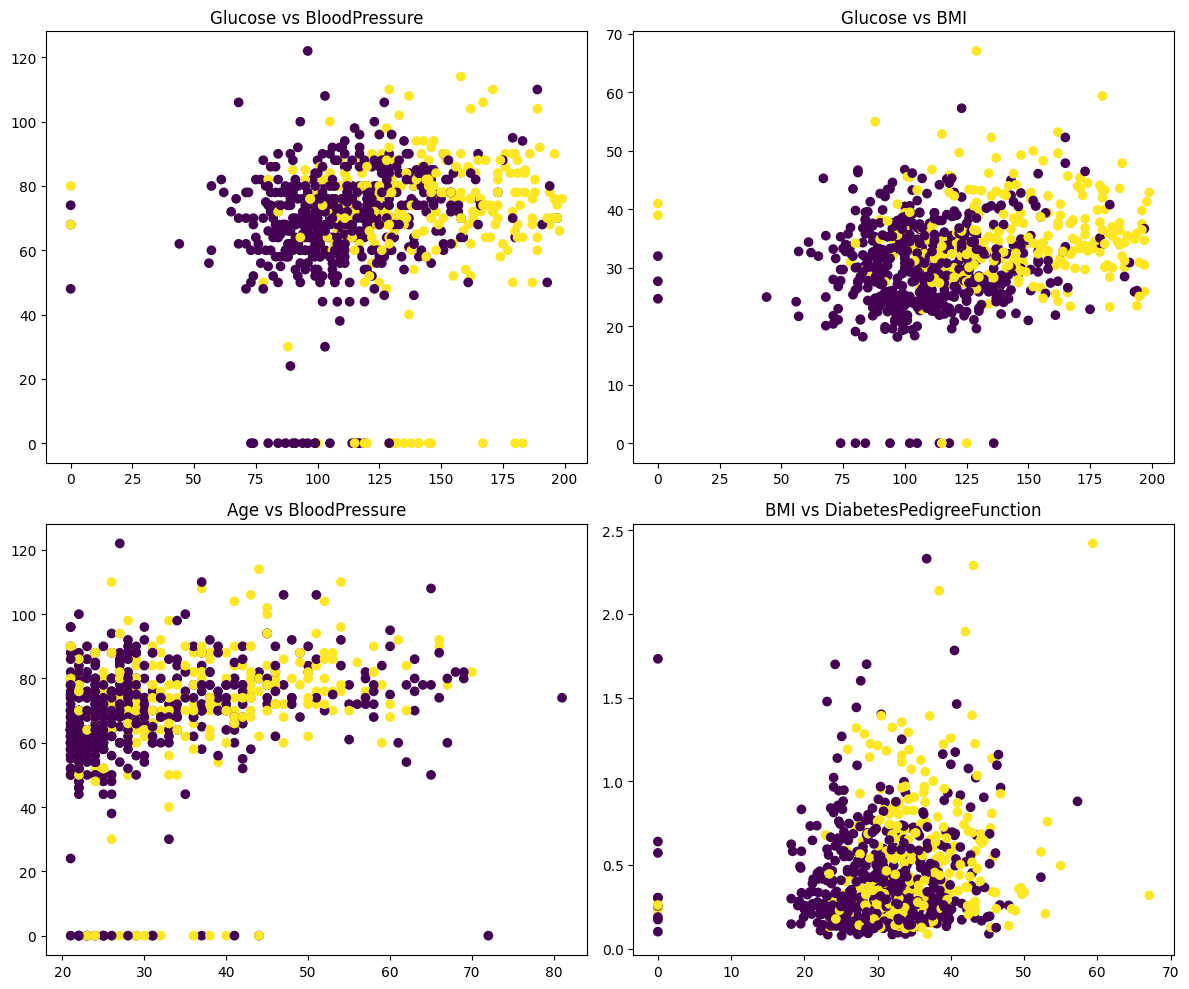

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(df_binary['Glucose'], df_binary['BloodPressure'], c=df_binary['Outcome'])
axs[0, 0].set_title('Glucose vs BloodPressure')
axs[1, 1].scatter(df_binary['BMI'], df_binary['DiabetesPedigreeFunction'], c=df_binary['Outcome'])
axs[1, 1].set_title('BMI vs DiabetesPedigreeFunction')
axs[0, 1].scatter(df_binary['Glucose'], df_binary['BMI'], c=df_binary['Outcome'])
axs[0, 1].set_title('Glucose vs BMI')
axs[1, 0].scatter(df_binary['Age'], df_binary['BloodPressure'], c=df_binary['Outcome'])
axs[1, 0].set_title('Age vs BloodPressure')

plt.tight_layout()
plt.show()

In [ ]:
X_binary = df_binary.drop(columns='Outcome')
y_binary = df_binary['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=1)



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154


Accuracy Score: 0.7792207792207793


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


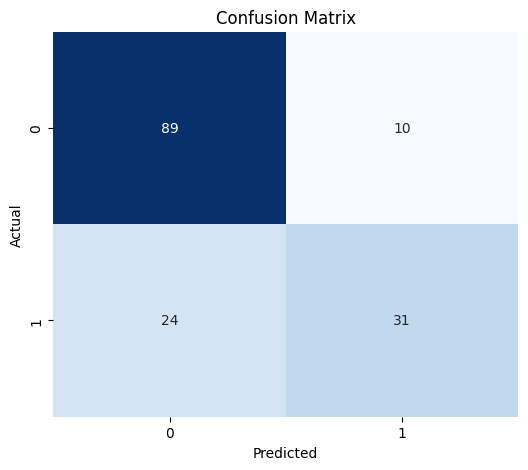

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1. Матрица ошибок (Confusion Matrix):
Класс 0 (отсутствие диабета):
Модель правильно классифицировала 89 из 99 образцов (значение в верхнем левом углу).
Ошибочно классифицировано как класс 1 — 10 раз (значение в верхнем правом углу).
Класс 1 (наличие диабета):
Модель правильно классифицировала 31 из 55 образцов (значение в нижнем правом углу).
Ошибочно классифицировано как класс 0 — 24 раза (значение в нижнем левом углу).
Это показывает, что модель лучше определяет отсутствие диабета (класс 0), чем его наличие (класс 1).

2. Точность (Precision):
Для класса 0 — 79%: из всех предсказанных случаев отсутствия диабета, 79% были правильными.
Для класса 1 — 76%: из всех предсказанных случаев наличия диабета, 76% были правильными.
Вывод: Точность для обоих классов примерно одинакова, но для класса 0 она немного выше.

3. Полнота (Recall):
Для класса 0 — 90%: из всех реальных случаев отсутствия диабета, модель правильно предсказала 90%.
Для класса 1 — 56%: из всех реальных случаев наличия диабета, модель правильно предсказала только 56%.
Вывод: Полнота для класса 1 заметно ниже, чем для класса 0. Это значит, что модель часто не распознает случаи наличия диабета.

4. F1-мера (F1-score):
Для класса 0 — 0.84: высокая F1-мера показывает сбалансированность точности и полноты для этого класса.
Для класса 1 — 0.65: более низкое значение F1-меры говорит о том, что модель менее эффективно распознает этот класс.
5. Общая точность (Accuracy):
Общая точность модели составляет 78%, то есть модель правильно классифицировала 78% всех примеров в тестовой выборке.

Заключение:
Модель лучше определяет отсутствие диабета, чем его наличие. Она демонстрирует высокую точность и полноту для класса 0, но страдает от низкой полноты для класса 1, что приводит к тому, что многие случаи диабета остаются непризнанными. Это может быть связано с дисбалансом классов или недостаточностью признаков для точного определения диабета.

1 Что такое логистическая регрессия и в каких случаях она применяется?
   Логистическая регрессия — это алгоритм машинного обучения, используемый для решения задач бинарной классификации, то есть когда нужно предсказать, к какой из двух категорий относится наблюдение (например, «да» или «нет», «успех» или «неудача»). Она применяется, когда целевая переменная является категориальной и бинарной, например, для предсказания, переживет ли пациент болезнь, или определение, купит ли пользователь продукт.

2 Какова основная цель логистической регрессии?
Основная цель логистической регрессии — предсказать вероятность принадлежности наблюдения к определенному классу (например, вероятность успешного исхода события). Для этого используется сигмоидная функция, которая возвращает значение в диапазоне от 0 до 1, указывая на вероятность отнесения к целевому классу.

3 В чем разница между логистической регрессией и линейной регрессией?
Линейная регрессия используется для предсказания количественных (непрерывных) значений, например, цены или роста. Логистическая регрессия, наоборот, применяется для предсказания категорий (обычно бинарных). В логистической регрессии используется сигмоидная функция для преобразования линейного уравнения в вероятность, которая затем интерпретируется как принадлежность к классу. Линейная регрессия дает предсказание в виде числа, тогда как логистическая — вероятность, которую затем можно интерпретировать как класс.

4 Какие предпосылки необходимо проверить перед применением логистической регрессии?
Основные предпосылки для логистической регрессии:
   - Линейная зависимость между независимыми переменными и логарифмом шансов (логарифмом вероятности принадлежности к классу).
   - Отсутствие мультиколлинеарности между независимыми переменными (они не должны быть сильно коррелированными).
   - Независимость наблюдений друг от друга.

5 Как интерпретировать коэффициенты логистической регрессии?
 Коэффициенты логистической регрессии (бета-коэффициенты) показывают изменение в логарифме шансов (логарифм odds), вызванное изменением независимой переменной на одну единицу, при условии, что остальные переменные остаются постоянными. Экспоненциальное преобразование коэффициента дает отношение шансов (odds ratio), которое можно интерпретировать как изменение вероятности для одного класса по отношению к другому.

6 Что такое функция логистической (сигмоидной) функции и как она используется в
логистической регрессии?
Логистическая функция или сигмоидная функция выглядит так:
   
   
   S(x) = 1 / (1 + e^(-x))
   
   Она принимает любое действительное значение на входе и выводит значение от 0 до 1. В логистической регрессии сигмоидная функция преобразует линейную комбинацию входных данных (предсказанную линейной моделью) в вероятность, которую можно интерпретировать как вероятность принадлежности к одному из классов.

7 Каковы основные метрики для оценки качества модели логистической регрессии?
Основные метрики включают:
   - Точность (accuracy): Доля правильно предсказанных классов.
   - Полнота (recall): Доля истинных положительных результатов, правильно предсказанных моделью.
   - Точность (precision): Доля предсказанных положительных результатов, которые являются истинно положительными.
   - F1-мера: Среднее гармоническое точности и полноты.
   - AUC-ROC: Площадь под кривой ROC, показывающая способность модели различать классы.